In [53]:
!pip install torchsummary

In [54]:
!pip list

Package                       Version
----------------------------- ------------------
absl-py                       0.12.0
aiohttp                       3.8.1
aiosignal                     1.2.0
albumentations                1.1.0
antlr4-python3-runtime        4.8
anyio                         3.4.0
appdirs                       1.4.4
argon2-cffi                   21.1.0
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.1
attrs                         21.2.0
audioread                     2.1.9
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.6.0
black                         21.12b0
bleach                        4.1.0
branca                        0.4.2
brotlipy                      0.7.0
cachetools                    4.2.4
certifi                       2021.10.8
cffi                          1.15.0
chardet                       3.0.4
charset-normalizer            2.0.8
clang 

In [55]:
!nvidia-smi

Thu Aug 31 13:20:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.182.03   Driver Version: 470.182.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |   4930MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [56]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [58]:
# 데이터 로딩
data_dir = "/aiffel/aiffel/projec/train_set"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [59]:
# printing the disease names
print(diseases)

['betweenErythema3___notbad', 'betweenErythema3___good', 'betweenErythema3___bad', 'betweenErythema3___serious']


In [60]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 4


In [61]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    plant_parts = plant.split('___')
    if len(plant_parts) >= 2:  # 검사 추가
        if plant_parts[0] not in plants:
            plants.append(plant_parts[0])
        if plant_parts[1] != 'healthy':
            NumberOfDiseases += 1

In [62]:
# unique plants in the dataset
print(f"두피증상 종류는: \n{plants}")

두피증상 종류는: 
['betweenErythema3']


In [63]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 1


In [64]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 4


In [12]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
class4,4
HairLoss6___good,47
betweenErythema3___notbad,170
HairLoss6___serious,72
oversebum2___bad,110
deadskin1___serious,85
HairLoss6___notbad,249
oversebum2___good,48
Erythema___pustule4___notbad,97
deadskin1___good,46


ValueError: shape mismatch: objects cannot be broadcast to a single shape

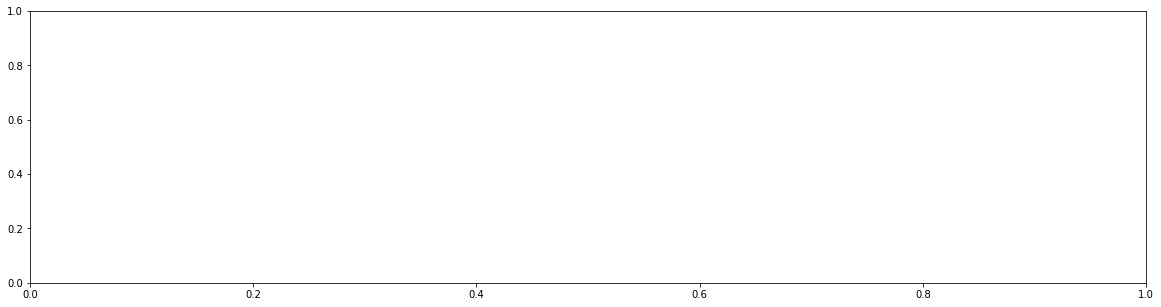

In [84]:
# plotting number of images available for each disease
index = [n for n in range(10)]
#index = [n for n in list(nums.values())[:10]]
plt.figure(figsize=(20, 5))
#plt.bar(index, [n for n in (nums.values())[:10]], width=0.3)
plt.bar(index, [nums[disease] for disease in nums.keys()], width=0.3)

plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [85]:
# 학습가능한 이미지
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 2446 images for training


In [86]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

In [87]:
# 이미지 shape
img, label = train[0]
print(img.shape, label)

torch.Size([3, 480, 640]) 0


In [88]:
# total number of classes in train set
len(train.classes)

4

In [89]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :betweenErythema3___bad(0)


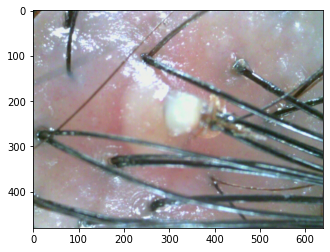

In [90]:
show_image(*train[0])

Label :betweenErythema3___serious(3)


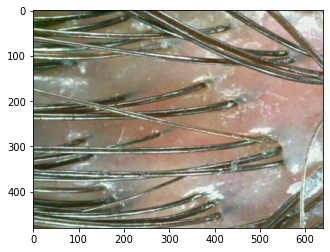

In [93]:
show_image(*train[380])

Label :betweenErythema3___notbad(2)


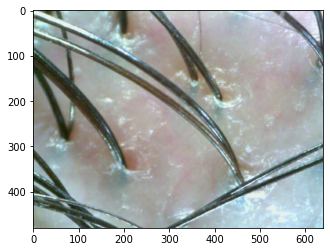

In [94]:
show_image(*train[220])

In [95]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

In [23]:
# setting the batch size
#batch_size = 16

In [96]:
# DataLoaders for training and validation

train_dl = torch.utils.data.DataLoader(train, batch_size=8, shuffle=True, num_workers=2, pin_memory=True)
train_dl.dataset.transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

valid_dl = DataLoader(valid, batch_size=8, num_workers=2, pin_memory=True)  # batch_size를 설정
valid_dl.dataset.transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])



In [97]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

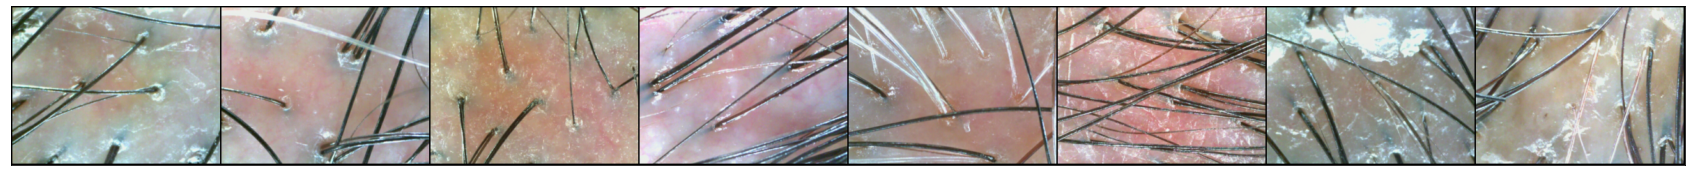

In [98]:
# Images for first batch of training
show_batch(train_dl) 

In [99]:
# Mocdelling
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("uda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [100]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")


In [101]:
# Moving data into GPU
device = get_default_device()

train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)


In [102]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [103]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))
        

In [104]:
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(2))  # 풀링 크기를 2로 수정
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()

        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True)  # 풀링 크기를 2로 수정
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))

        self.conv3 = ConvBlock(128, 256, pool=True)  # 풀링 크기를 2로 수정
        self.conv4 = ConvBlock(256, 512, pool=True)  # 풀링 크기를 2로 수정
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))

        self.classifier = nn.Sequential(nn.AdaptiveAvgPool2d(1),  # Adaptive 평균 풀링 사용
                                         nn.Flatten(),
                                         nn.Linear(512, num_diseases))

    def forward(self, xb):  # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


In [105]:
# num_diseases = len(train.classes)
# model = to_device(ResNet9(3, num_classes), device)

num_diseases = len(train.classes)
model = to_device(ResNet9(3, num_diseases), device)


In [106]:
# getting summary of the model
INPUT_SHAPE = (3, 256, 256)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7        [-1, 128, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]         147,584
       BatchNorm2d-9        [-1, 128, 128, 128]             256
             ReLU-10        [-1, 128, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]         147,584
      BatchNorm2d-12        [-1, 128, 128, 128]             256
             ReLU-13        [-1, 128, 128, 128]               0
           Conv2d-14        [-1, 256, 1

In [107]:
# for training
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history
    

In [108]:
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()

        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True)
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))

        self.conv3 = ConvBlock(128, 256, pool=True)
        self.conv4 = ConvBlock(256, 512, pool=True)
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))

        # 수정된 부분: 분류기의 출력 크기를 변경
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                        nn.Flatten(),
                                        nn.Linear(512, num_diseases))  # num_diseases에 맞게 출력 크기 변경
        
    def forward(self, xb):
        x = self.conv1(xb)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.res1(x)
        x = self.res2(x)
        x = F.avg_pool2d(x, 4)
        x = x.view(x.size(0), -1)  # 텐서를 평탄화합니다
        return self.classifier(x)


In [109]:
%%time
history = [evaluate(model, valid_dl)]
history

CPU times: user 1.62 s, sys: 169 ms, total: 1.79 s
Wall time: 1.89 s


[{'val_loss': tensor(1.3879, device='cuda:0'), 'val_accuracy': tensor(0.2434)}]

In [110]:
epochs = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [111]:
%%time
history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=1e-4, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00275, train_loss: 1.0407, val_loss: 1.1167, val_acc: 0.6250
Epoch [1], last_lr: 0.00757, train_loss: 1.1081, val_loss: 89.3282, val_acc: 0.2763
Epoch [2], last_lr: 0.01000, train_loss: 1.2252, val_loss: 1.8521, val_acc: 0.2566
Epoch [3], last_lr: 0.00950, train_loss: 1.2651, val_loss: 2.5094, val_acc: 0.2763
Epoch [4], last_lr: 0.00812, train_loss: 1.0172, val_loss: 1.4056, val_acc: 0.4868
Epoch [5], last_lr: 0.00611, train_loss: 0.8927, val_loss: 1.1641, val_acc: 0.4671
Epoch [6], last_lr: 0.00389, train_loss: 0.9373, val_loss: 0.8448, val_acc: 0.6382
Epoch [7], last_lr: 0.00188, train_loss: 0.8564, val_loss: 0.8917, val_acc: 0.6184
Epoch [8], last_lr: 0.00050, train_loss: 0.7681, val_loss: 0.8013, val_acc: 0.7105
Epoch [9], last_lr: 0.00000, train_loss: 0.7868, val_loss: 0.7674, val_acc: 0.6908
CPU times: user 1min 33s, sys: 1min 7s, total: 2min 41s
Wall time: 2min 42s


In [112]:
# Plotting
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

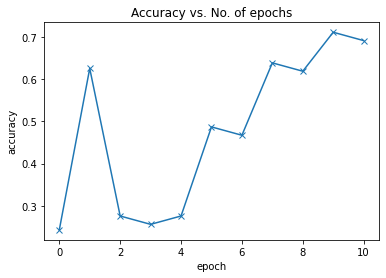

In [113]:
# validation accuracy
plot_accuracies(history)

In [42]:
# plot_losses(history)

In [114]:
def plot_losses(history):
    train_losses = [x.get('train_loss').item() for x in history]
    val_losses = [x['val_loss'].cpu().item() for x in history]  # 여기서 .cpu() 추가
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')


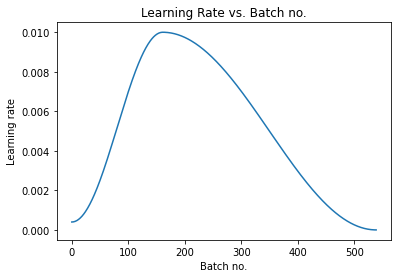

In [115]:
plot_lrs(history)

In [116]:
test_dir = "/aiffel/aiffel/projec/test"
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [117]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

['Erythemapustule4___bad0.jpg',
 'Erythemapustule4___bad1.jpg',
 'Erythemapustule4___bad10.jpg',
 'Erythemapustule4___bad11.jpg',
 'Erythemapustule4___bad12.jpg',
 'Erythemapustule4___bad13.jpg',
 'Erythemapustule4___bad14.jpg',
 'Erythemapustule4___bad15.jpg',
 'Erythemapustule4___bad16.jpg',
 'Erythemapustule4___bad17.jpg',
 'Erythemapustule4___bad18.jpg',
 'Erythemapustule4___bad19.jpg',
 'Erythemapustule4___bad2.jpg',
 'Erythemapustule4___bad20.jpg',
 'Erythemapustule4___bad3.jpg',
 'Erythemapustule4___bad4.jpg',
 'Erythemapustule4___bad5.jpg',
 'Erythemapustule4___bad6.jpg',
 'Erythemapustule4___bad7.jpg',
 'Erythemapustule4___bad8.jpg',
 'Erythemapustule4___bad9.jpg',
 'Erythemapustule4___good0.jpg',
 'Erythemapustule4___good1.jpg',
 'Erythemapustule4___good10.jpg',
 'Erythemapustule4___good11.jpg',
 'Erythemapustule4___good12.jpg',
 'Erythemapustule4___good13.jpg',
 'Erythemapustule4___good14.jpg',
 'Erythemapustule4___good2.jpg',
 'Erythemapustule4___good3.jpg',
 'Erythemapustu

In [118]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

Label: Erythemapustule4___bad0.jpg , Predicted: betweenErythema3___notbad


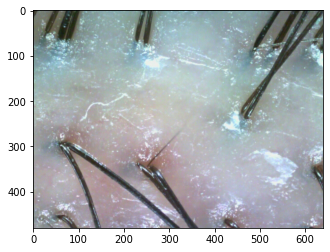

In [120]:
# predicting first image
img, label = test[2]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

In [121]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model
                                                                 ))

Label: Erythemapustule4___bad0.jpg , Predicted: betweenErythema3___serious
Label: Erythemapustule4___bad1.jpg , Predicted: betweenErythema3___good
Label: Erythemapustule4___bad10.jpg , Predicted: betweenErythema3___notbad
Label: Erythemapustule4___bad11.jpg , Predicted: betweenErythema3___notbad
Label: Erythemapustule4___bad12.jpg , Predicted: betweenErythema3___notbad
Label: Erythemapustule4___bad13.jpg , Predicted: betweenErythema3___good
Label: Erythemapustule4___bad14.jpg , Predicted: betweenErythema3___notbad
Label: Erythemapustule4___bad15.jpg , Predicted: betweenErythema3___bad
Label: Erythemapustule4___bad16.jpg , Predicted: betweenErythema3___notbad
Label: Erythemapustule4___bad17.jpg , Predicted: betweenErythema3___notbad
Label: Erythemapustule4___bad18.jpg , Predicted: betweenErythema3___good
Label: Erythemapustule4___bad19.jpg , Predicted: betweenErythema3___serious
Label: Erythemapustule4___bad2.jpg , Predicted: betweenErythema3___serious
Label: Erythemapustule4___bad20.jp

In [50]:
# saving to the kaggle working directory
PATH = './hair.pth'  
torch.save(model.state_dict(), PATH)